In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
!cat experiments_results/transfer_densenet121_cifar100_to_cifar10_lr_0.00100_all_layers/result_outputs/test_summary.csv

In [144]:
root = 'experiments_results'

In [145]:
models = ['resnet56', 'densenet121']
datasets=['cifar10', 'cifar100']
lr=[0.001, 0.01, 0.1]
transfer=['all_layers', 'last_layer']

In [146]:
datasets[1]

'cifar100'

In [147]:
import os
data = []
for di in [[0,1], [1,0]]:
    d1 = datasets[di[0]]
    d2 = datasets[di[1]]
    for m in models:
        for t in transfer:
            for l in lr:
                dire = 'transfer_'+m+'_'+d1+'_to_'+d2+'_lr_'+'%.5f_'%l +t +'/result_outputs/test_summary.csv'
                f=pd.read_csv(os.path.join(root,dire))
                data.append([d1+' to '+d2, m, t,l, f['test_acc'][0]])
#                 print(d1+' to '+d2+'\t'+m+'\t'+'\tLR:'+'%.3f\t'%l +t, '%.3f' %f['test_acc'][0])

In [148]:
df = pd.DataFrame(data, columns=['Direction', 'Model', 'Transfer Method', 'Learning Rate', 'Test Accuracy'])

In [149]:
df = df.set_index('Direction', drop=True)

In [150]:
df

,Model,Transfer Method,Learning Rate,Test Accuracy
Direction,,,,
cifar10 to cifar100,resnet56,all_layers,0.001,0.291139
cifar10 to cifar100,resnet56,all_layers,0.010,0.586926
cifar10 to cifar100,resnet56,all_layers,0.100,0.682259
cifar10 to cifar100,resnet56,last_layer,0.001,0.175237
cifar10 to cifar100,resnet56,last_layer,0.010,0.276503
cifar10 to cifar100,resnet56,last_layer,0.100,0.345431
cifar10 to cifar100,densenet121,all_layers,0.001,0.362441
cifar10 to cifar100,densenet121,all_layers,0.010,0.696895
cifar10 to cifar100,densenet121,all_layers,0.100,0.755142


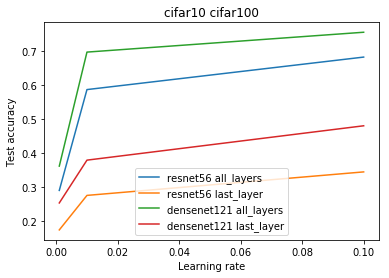

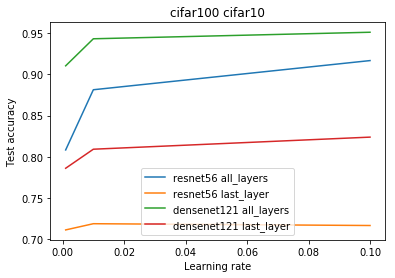

In [167]:
for di in [[0,1], [1,0]]:
    d1 = datasets[di[0]]
    d2 = datasets[di[1]]
    plt.figure()
    plt.title(d1+' '+d2)
    plt.ylabel('Test accuracy')
    plt.xlabel('Learning rate')
    for m in models:
        for t in transfer:
            dd = df[(df['Model']==m) & (df['Transfer Method']==t)].loc[d1+' to '+d2]
# dd = df[(df['Model']=='resnet56') & (df['Transfer Method']=='all_layers')].loc['cifar10 to cifar100']
            x = dd['Learning Rate']
            y = dd['Test Accuracy']
            plt.plot(x,y, label=m+' '+t)
    plt.legend()
plt.show()